In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

In [2]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline

In [3]:
from scripts.my_camera_cal import image_perspective

In [4]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [5]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\harder1.jpg', '../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [6]:
# Read in an image
image = mpimg.imread('../test_images/test4.jpg')
print(image.shape)

#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)
(720, 1280, 3)


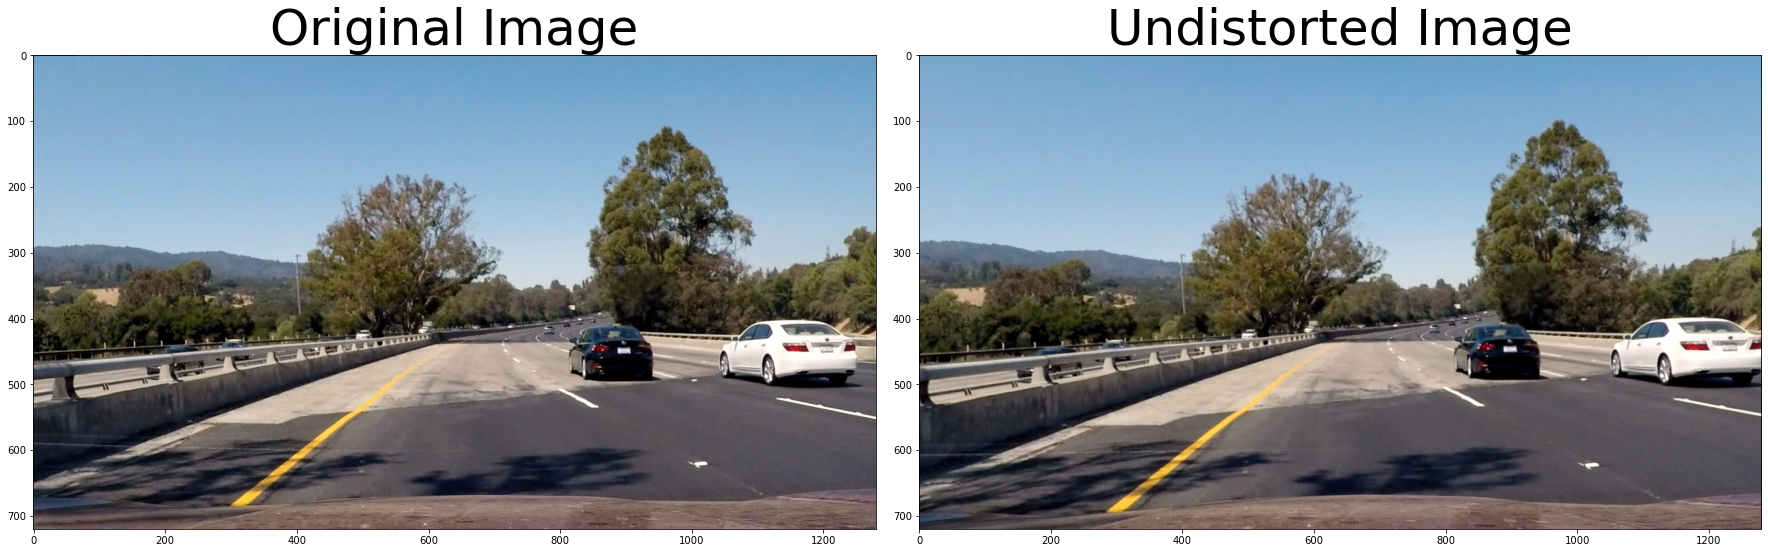

In [7]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [8]:
color_binary,combined_binary= pipeline(dst,channel='s',color_thresh=(110,255), orient='x', sobel_thresh=(20, 100))

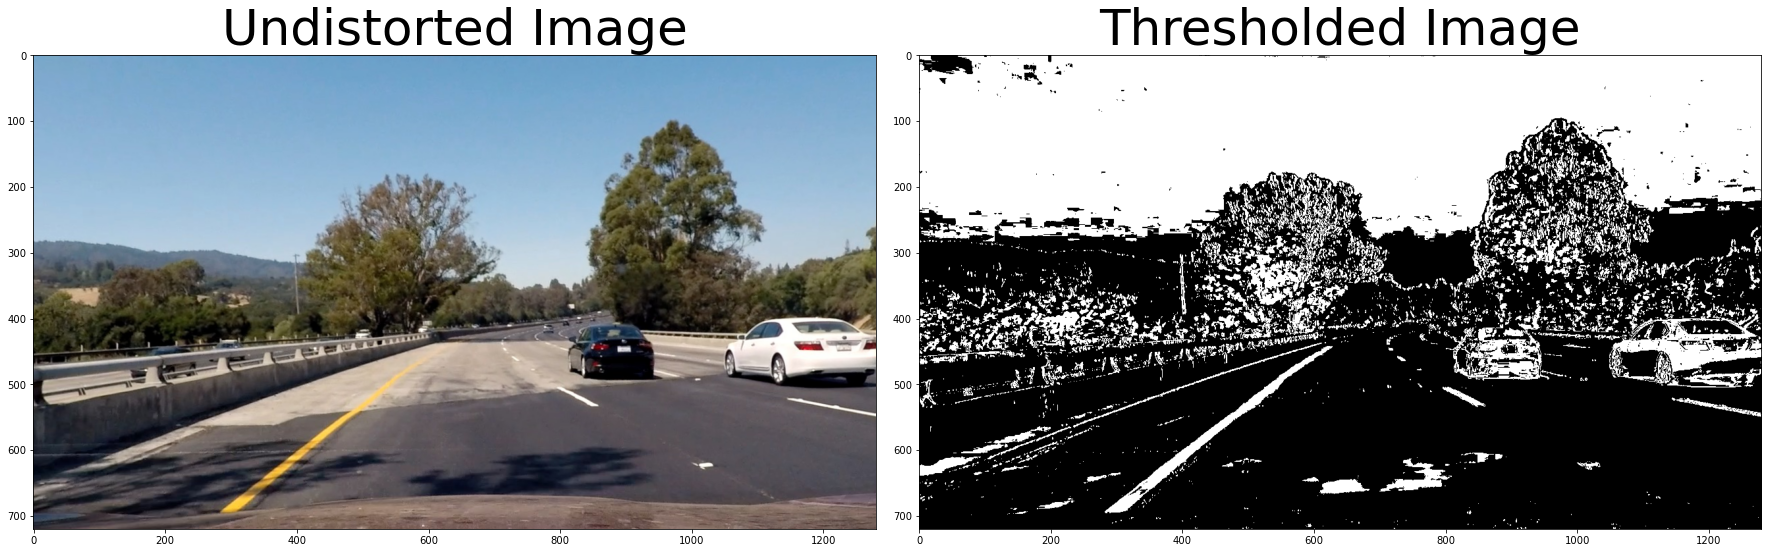

In [9]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(combined_binary,cmap="gray")
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [10]:
print(combined_binary.shape)

(720, 1280)


## From here we do a Perspective Transform

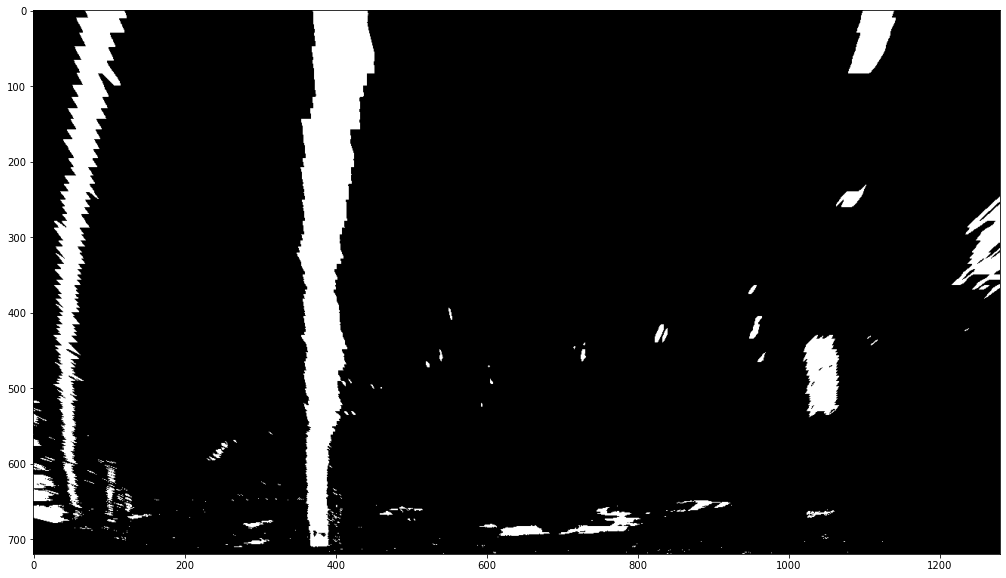

In [11]:
bird_image,M=image_perspective(combined_binary)
plt.figure(figsize=(20,10))
plt.imshow(bird_image,cmap="gray")

In [12]:
puntos= [(580, 460), (202, 720), (1110, 720), (703, 460)]
puntos.append(puntos[0])
xs, ys = zip(*puntos) #create lists of x and y values
coord2=  [(336, 0), (336, 720), (976, 720), (976, 0)]
coord2.append(coord2[0])
x3s,y3s= zip(*coord2)

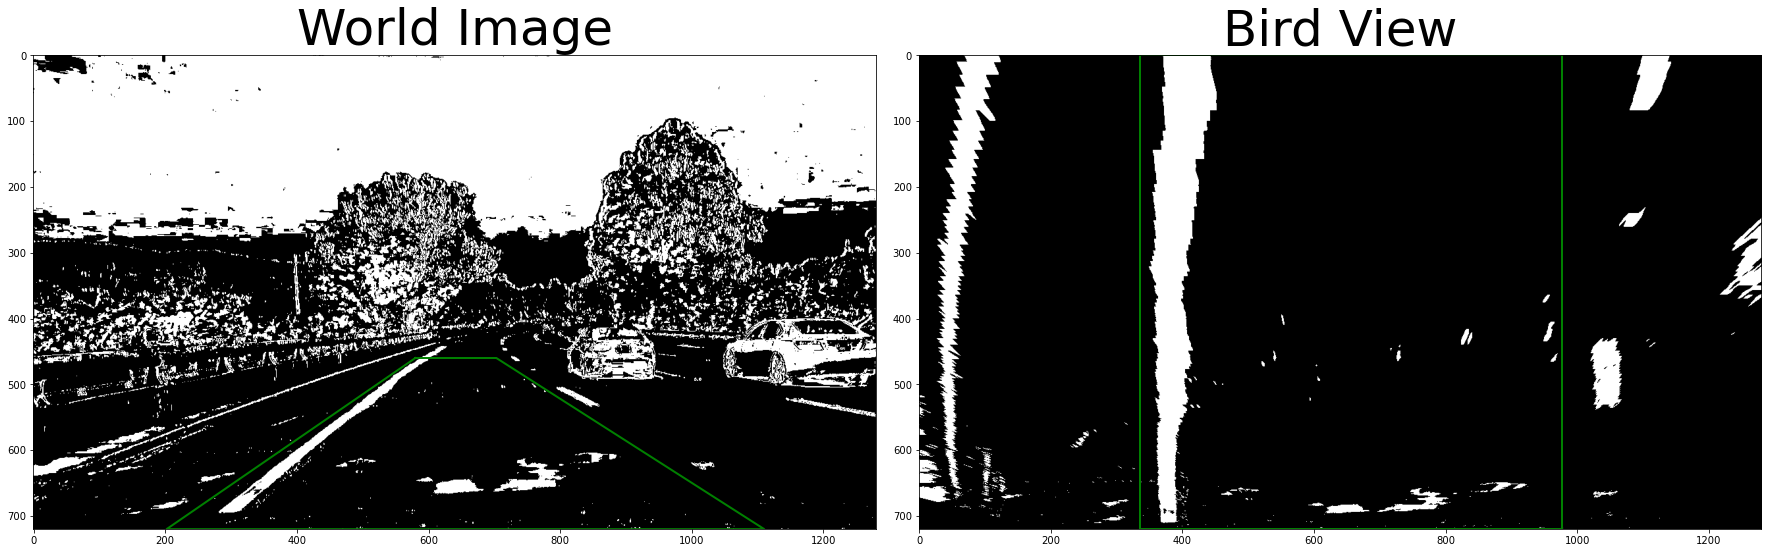

In [13]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.plot(xs,ys,color='green',linewidth=2)
ax1.imshow(combined_binary,cmap='gray')
ax1.set_title('World Image', fontsize=50)
ax2.plot(x3s,y3s,color='green',linewidth=2)
ax2.imshow(bird_image,cmap="gray")
ax2.set_title('Bird View', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [14]:
f.savefig('../output_images/thresholded_bird4.jpg')

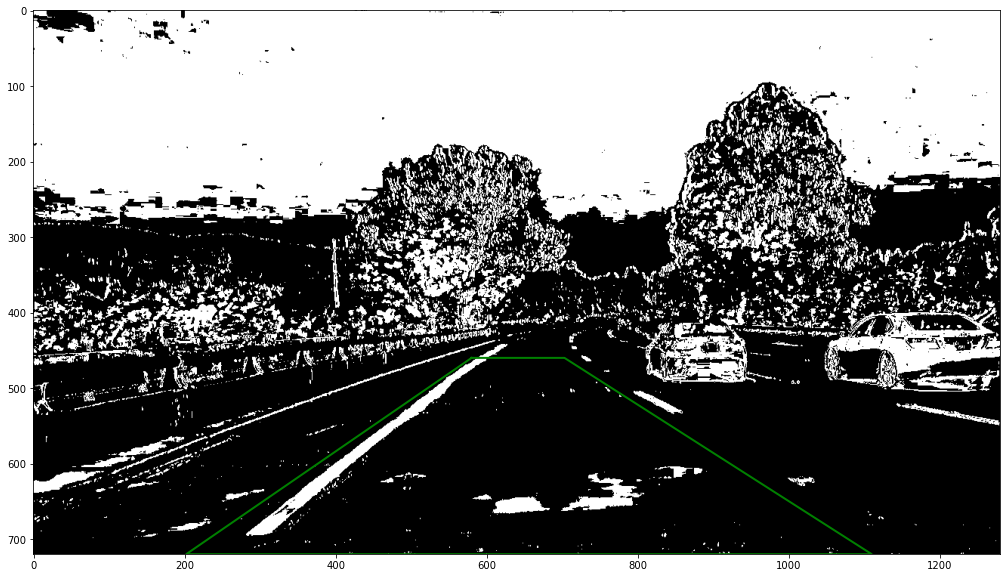

In [15]:
plt.figure(figsize=(20,10))
plt.plot(xs,ys,color='green',linewidth=2)
plt.imshow(combined_binary,cmap="gray")

Just to see how it looks in the real world :)

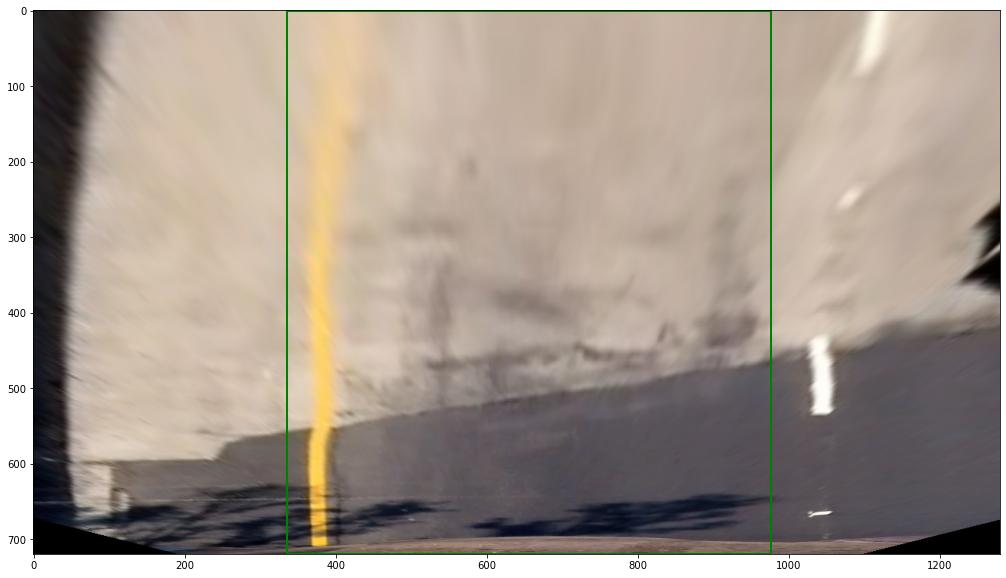

In [16]:
bird_image2,M2=image_perspective(dst)
plt.figure(figsize=(20,10))
plt.plot(x3s,y3s,color='green',linewidth=2)
plt.imshow(bird_image2)

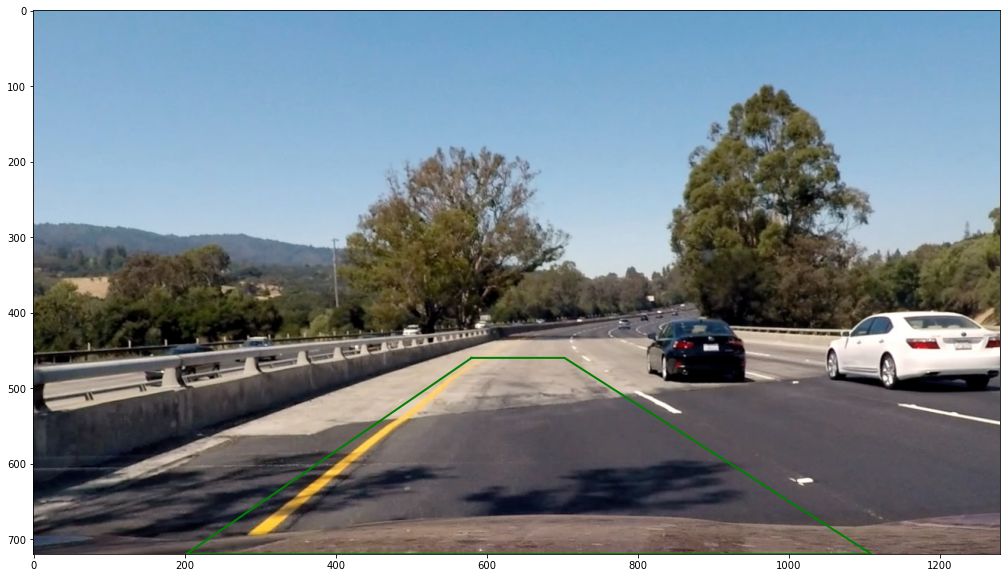

In [17]:
plt.figure(figsize=(20,10))
plt.plot(xs,ys,color='green',linewidth=2)
plt.imshow(dst)

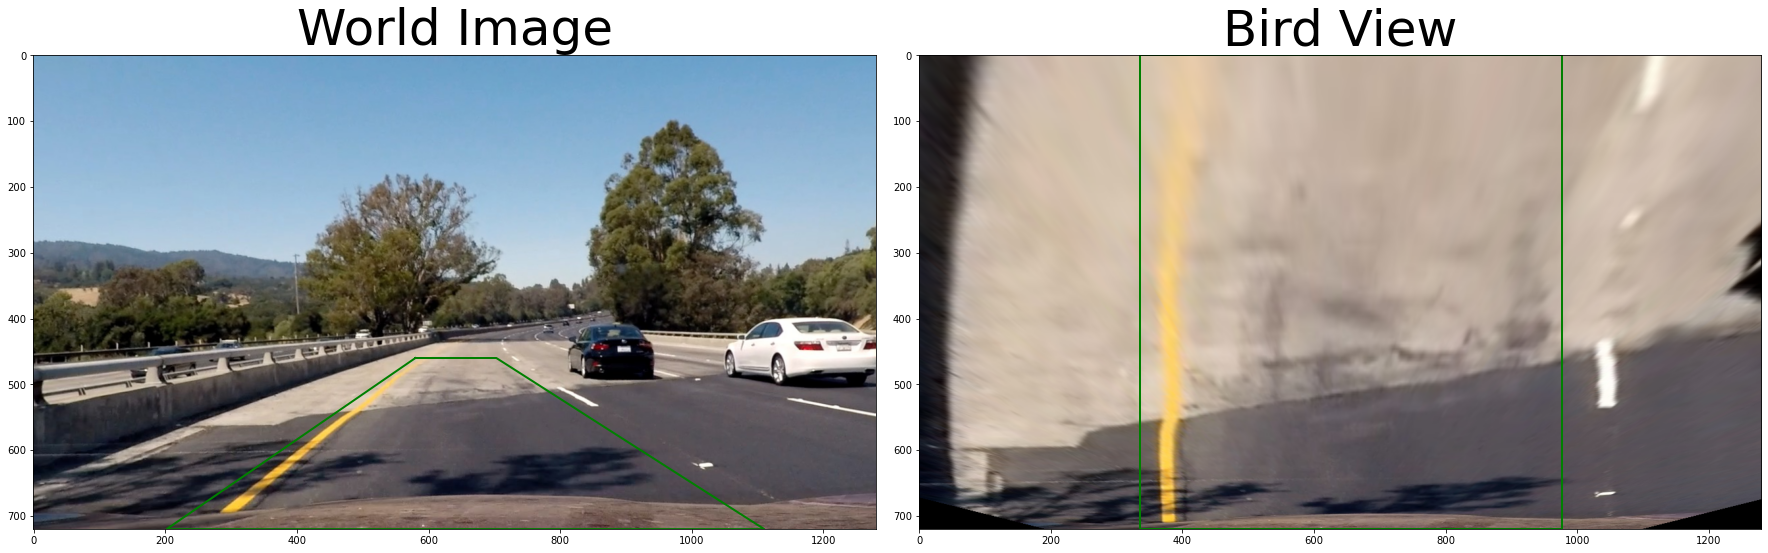

In [18]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.plot(xs,ys,color='green',linewidth=2)
ax1.imshow(dst,cmap='gray')
ax1.set_title('World Image', fontsize=50)
ax2.plot(x3s,y3s,color='green',linewidth=2)
ax2.imshow(bird_image2,cmap="gray")
ax2.set_title('Bird View', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [19]:
f.savefig('../output_images/world_bird4.jpg')